William Andres Gomez Roa

# PUNTO 1: PCA

In [29]:
install.packages(c("corrplot","psych","FactoMineR","factoextra","reshape2","RColorBrewer"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
library(readxl)
library(psych)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [43]:
paper<-read_excel("HBPAPER.xlsx")
str(paper)

tibble [100 × 24] (S3: tbl_df/tbl/data.frame)
 $ ID : num [1:100] 1 2 3 4 5 6 7 8 9 10 ...
 $ X1 : num [1:100] 2 3 3 1 2 1 1 2 2 1 ...
 $ X2 : num [1:100] 0 1 0 1 0 1 1 0 1 0 ...
 $ X3 : num [1:100] 1 0 1 1 1 0 1 1 1 1 ...
 $ X4 : num [1:100] 1 0 1 1 0 1 1 1 1 1 ...
 $ X5 : num [1:100] 1 0 1 0 1 0 0 0 0 0 ...
 $ X6 : num [1:100] 8.5 8.2 9.2 6.4 9 6.5 6.9 6.2 5.8 6.4 ...
 $ X7 : num [1:100] 3.9 2.7 3.4 3.3 3.4 2.8 3.7 3.3 3.6 4.5 ...
 $ X8 : num [1:100] 2.5 5.1 5.6 7 5.2 3.1 5 3.9 5.1 5.1 ...
 $ X9 : num [1:100] 5.9 7.2 5.6 3.7 4.6 4.1 2.6 4.8 6.7 6.1 ...
 $ X10: num [1:100] 4.8 3.4 5.4 4.7 2.2 4 2.1 4.6 3.7 4.7 ...
 $ X11: num [1:100] 4.9 7.9 7.4 4.7 6 4.3 2.3 3.6 5.9 5.7 ...
 $ X12: num [1:100] 6 3.1 5.8 4.5 4.5 3.7 5.4 5.1 5.8 5.7 ...
 $ X13: num [1:100] 6.8 5.3 4.5 8.8 6.8 8.5 8.9 6.9 9.3 8.4 ...
 $ X14: num [1:100] 4.7 5.5 6.2 7 6.1 5.1 4.8 5.4 5.9 5.4 ...
 $ X15: num [1:100] 4.3 4 4.6 3.6 4.5 9.5 2.5 4.8 4.4 5.3 ...
 $ X16: num [1:100] 5 3.9 5.4 4.3 4.5 3.6 2.1 4.3 4.4 4.1 ...
 $ 

In [44]:
X<-paper[,c(7,8,9,10,11,12,13,14,15,16,17,18,19)]
str(X) #variables que explican la percepcion del rendimiento

tibble [100 × 13] (S3: tbl_df/tbl/data.frame)
 $ X6 : num [1:100] 8.5 8.2 9.2 6.4 9 6.5 6.9 6.2 5.8 6.4 ...
 $ X7 : num [1:100] 3.9 2.7 3.4 3.3 3.4 2.8 3.7 3.3 3.6 4.5 ...
 $ X8 : num [1:100] 2.5 5.1 5.6 7 5.2 3.1 5 3.9 5.1 5.1 ...
 $ X9 : num [1:100] 5.9 7.2 5.6 3.7 4.6 4.1 2.6 4.8 6.7 6.1 ...
 $ X10: num [1:100] 4.8 3.4 5.4 4.7 2.2 4 2.1 4.6 3.7 4.7 ...
 $ X11: num [1:100] 4.9 7.9 7.4 4.7 6 4.3 2.3 3.6 5.9 5.7 ...
 $ X12: num [1:100] 6 3.1 5.8 4.5 4.5 3.7 5.4 5.1 5.8 5.7 ...
 $ X13: num [1:100] 6.8 5.3 4.5 8.8 6.8 8.5 8.9 6.9 9.3 8.4 ...
 $ X14: num [1:100] 4.7 5.5 6.2 7 6.1 5.1 4.8 5.4 5.9 5.4 ...
 $ X15: num [1:100] 4.3 4 4.6 3.6 4.5 9.5 2.5 4.8 4.4 5.3 ...
 $ X16: num [1:100] 5 3.9 5.4 4.3 4.5 3.6 2.1 4.3 4.4 4.1 ...
 $ X17: num [1:100] 5.1 4.3 4 4.1 3.5 4.7 4.2 6.3 6.1 5.8 ...
 $ X18: num [1:100] 3.7 4.9 4.5 3 3.5 3.3 2 3.7 4.6 4.4 ...


## Primer punto

In [45]:
R <- cor(X)
R

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
X6,1.00000000,-0.1371632174,0.0956004542,0.10637000,-0.05347313,0.47749341,-0.15181287,-0.40128188,0.08831231,0.02698820,0.10430307,-0.49313812,0.02771800
X7,-0.13716322,1.0000000000,0.0008667887,0.14017926,0.42989071,-0.05268784,0.79154371,0.22946240,0.05189819,-0.02742781,0.15614733,0.27066742,0.19163607
X8,0.09560045,0.0008667887,1.0000000000,0.09665660,-0.06287007,0.19262546,0.01699054,-0.27078668,0.79716793,-0.07357899,0.08010182,-0.18609639,0.02544069
X9,0.10637000,0.1401792611,0.0966565978,1.00000000,0.19691685,0.56141695,0.22975176,-0.12795425,0.14040830,0.05940111,0.75686859,0.39450634,0.86509170
X10,-0.05347313,0.4298907110,-0.0628700668,0.19691685,1.00000000,-0.01155082,0.54220366,0.13421689,0.01079207,0.08416610,0.18423559,0.33355482,0.27586308
X11,0.47749341,-0.0526878383,0.1926254565,0.56141695,-0.01155082,1.00000000,-0.06131553,-0.49494840,0.27307753,0.04616424,0.42440825,-0.37796681,0.60185021
X12,-0.15181287,0.7915437115,0.0169905395,0.22975176,0.54220366,-0.06131553,1.00000000,0.26459655,0.10745534,0.03164009,0.19512741,0.35224073,0.27155126
X13,-0.40128188,0.2294624014,-0.2707866821,-0.12795425,0.13421689,-0.49494840,0.26459655,1.00000000,-0.24498605,0.02316342,-0.11456703,0.47110961,-0.07287173
X14,0.08831231,0.0518981915,0.7971679258,0.14040830,0.01079207,0.27307753,0.10745534,-0.24498605,1.00000000,0.03519937,0.19706512,-0.17025280,0.10939460
X15,0.02698820,-0.0274278083,-0.0735789868,0.05940111,0.08416610,0.04616424,0.03164009,0.02316342,0.03519937,1.00000000,0.06853933,0.09413139,0.10574950


In [46]:
KMO(R)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = R)
Overall MSA =  0.61
MSA for each item = 
  X6   X7   X8   X9  X10  X11  X12  X13  X14  X15  X16  X17  X18 
0.87 0.62 0.53 0.89 0.81 0.45 0.59 0.88 0.53 0.31 0.86 0.44 0.53 

In [47]:
X <- X %>% select(X6, X7, X8, X9, X10, X12, X13, X14, X16, X18)
R <- cor(X)

In [48]:
KMO(R)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = R)
Overall MSA =  0.67
MSA for each item = 
  X6   X7   X8   X9  X10  X12  X13  X14  X16  X18 
0.61 0.64 0.52 0.69 0.81 0.63 0.74 0.53 0.83 0.72 

#### **¿Cuál es el MSA final para el dataset final?**

El MSA final es 0.67, el cual es bueno.

## SEGUNDO PUNTO

### Prueba de esfericidad de Bartlett

- $H_{0}: P=I$
- $H_{1}: P\neq I$


In [49]:
cortest.bartlett(R, n = nrow(X))

$chisq
[1] 502.9739

$p.value
[1] 1.130404e-78

$df
[1] 45

Rechazamos $H_{0}$ y por tanto podemos decir que las variables estan correlacionadas y es adecuado hacer ACP

## TERCER PUNTO

- Los autovalores sean mayores a $1$
- La varianza acumulada de los componentes expliquen almenos el $80\%$ de la varianza
- screeplot


In [50]:
componentestotal<-prcomp(X, center=TRUE, scale.=TRUE)
summary(componentestotal)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.7567 1.5077 1.2881 1.0192 0.77724 0.74069 0.54092
Proportion of Variance 0.3086 0.2273 0.1659 0.1039 0.06041 0.05486 0.02926
Cumulative Proportion  0.3086 0.5359 0.7018 0.8057 0.86613 0.92099 0.95025
                           PC8     PC9    PC10
Standard deviation     0.45408 0.41369 0.34669
Proportion of Variance 0.02062 0.01711 0.01202
Cumulative Proportion  0.97087 0.98798 1.00000

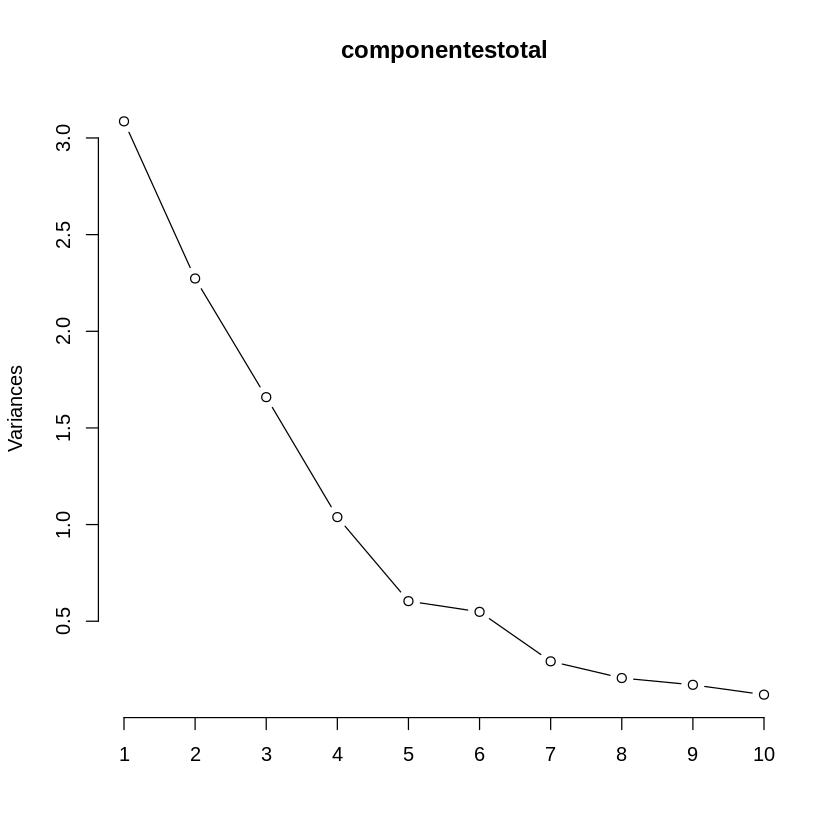

In [51]:
plot(componentestotal, type="l")

Con base en los 3 criterios anteriores podemos concluir que una elección adecuada serian tener los $4$ primeros componentes principales. Entre ellos explican el $80.5\%$ de la varianza original, todos sus valores propios son $>1$ y en la grafica de screeplot podemos ver que no hay una gran diferencia entre tomar $4$ o $5$ componentes (que tambien podría ser adecuado).

### **¿Cuál de los 3 escogería?**

El método de mi elección es tomar los componentes que expliquen $>80\%$ de la varianza para problemas de ciencias físicas o un $>70\%$ para problemas de ciencias sociales (como en actual).

## CUARTO PUNTO

In [52]:
componentes<-prcomp(X, center=TRUE, scale.=TRUE, rank.=4)
print(componentes)

Standard deviations (1, .., p=10):
 [1] 1.7567135 1.5076577 1.2881319 1.0192155 0.7772385 0.7406930 0.5409210
 [8] 0.4540793 0.4136925 0.3466857

Rotation (n x k) = (10 x 4):
             PC1        PC2          PC3        PC4
X6  -0.011217495 -0.3234951  0.089404597  0.7252919
X7  -0.309776820  0.3586534 -0.294935721  0.2122892
X8  -0.103747950 -0.3838297 -0.543796471 -0.1834601
X9  -0.466220092 -0.1768820  0.280926842 -0.1267878
X10 -0.300968190  0.2737537 -0.125293487  0.3237894
X12 -0.359059859  0.3556911 -0.292420869  0.1761740
X13  0.006095036  0.4606959 -0.007273368 -0.4142756
X14 -0.167212367 -0.3611092 -0.534350313 -0.1817630
X16 -0.445705183 -0.1792980  0.247538113 -0.1325315
X18 -0.479198924 -0.1089064  0.286912089 -0.1450816



Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Using medicion as id variables



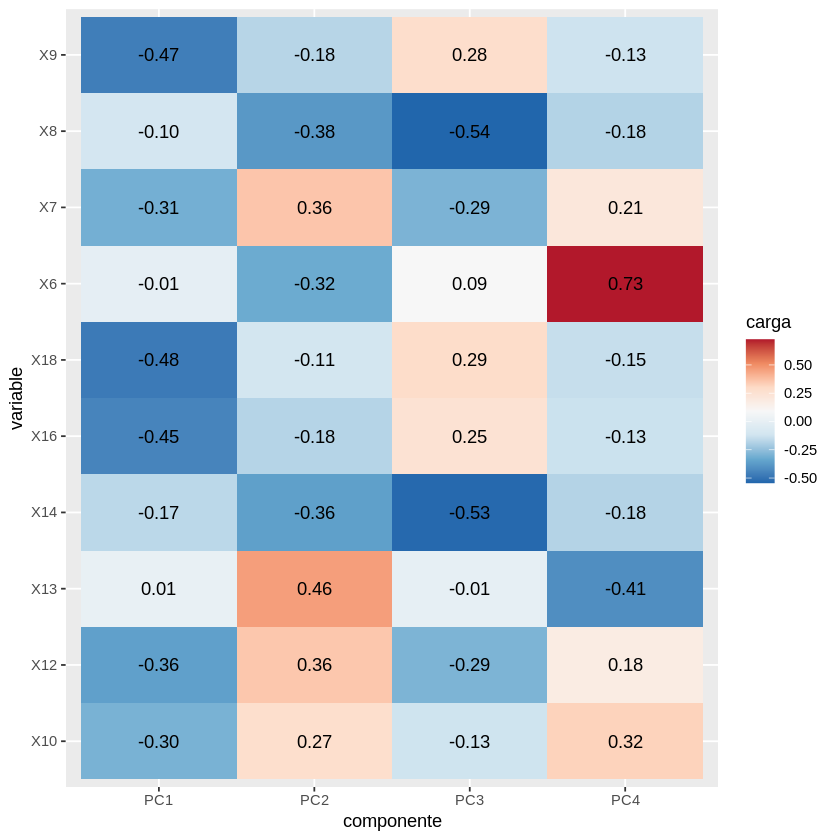

In [53]:
library(reshape2)
library(ggplot2)
cargas<-componentes$rotation
cargasdf<-as.data.frame(cargas)
cargasdf$medicion<-rownames(cargasdf)
cargasheat<-reshape2::melt(cargasdf)
colnames(cargasheat)<-c("variable","componente","carga")

ggplot(cargasheat,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

### **¿Cree que con esta solución se podría identificar claramente los factores agrupando variables originales?**

Es un poco ambigüa la asignacion de las variables con factores, ya que podemos ver que existe correlacion azul oscura o roja mas de una vez por cada variable, en su mayoría. Por ejemplo la variable $x13% tiene prtenecia al componente 2 casi de igual forma que al componente 4. Es por este fenomeno que se requiere realizar una rotación.

## QUINTO PUNTO

In [54]:
componentes2<-principal(X,nfactors=4,rotate="varimax")
# rotaciones disponibles: "none", "varimax", "quatimax", "promax", "oblimin", "simplimax", and "cluster"
componentes2$communality
componentes2$loadings

X6        X7        X8        X9       X10       X12       X13       X14 
0.7979811 0.7796785 0.8937300 0.8895521 0.5848385 0.8595670 0.6609157 0.8907841 
      X16       X18 
0.8060437 0.8940676


Loadings:
    RC1    RC2    RC3    RC4   
X6                        0.892
X7          0.868        -0.141
X8                 0.940       
X9   0.933  0.105              
X10  0.156  0.743              
X12  0.138  0.898        -0.168
X13 -0.104  0.228 -0.255 -0.730
X14  0.103         0.933       
X16  0.886                     
X18  0.931  0.167              

                 RC1   RC2   RC3   RC4
SS loadings    2.589 2.216 1.846 1.406
Proportion Var 0.259 0.222 0.185 0.141
Cumulative Var 0.259 0.481 0.665 0.806

Using medicion as id variables



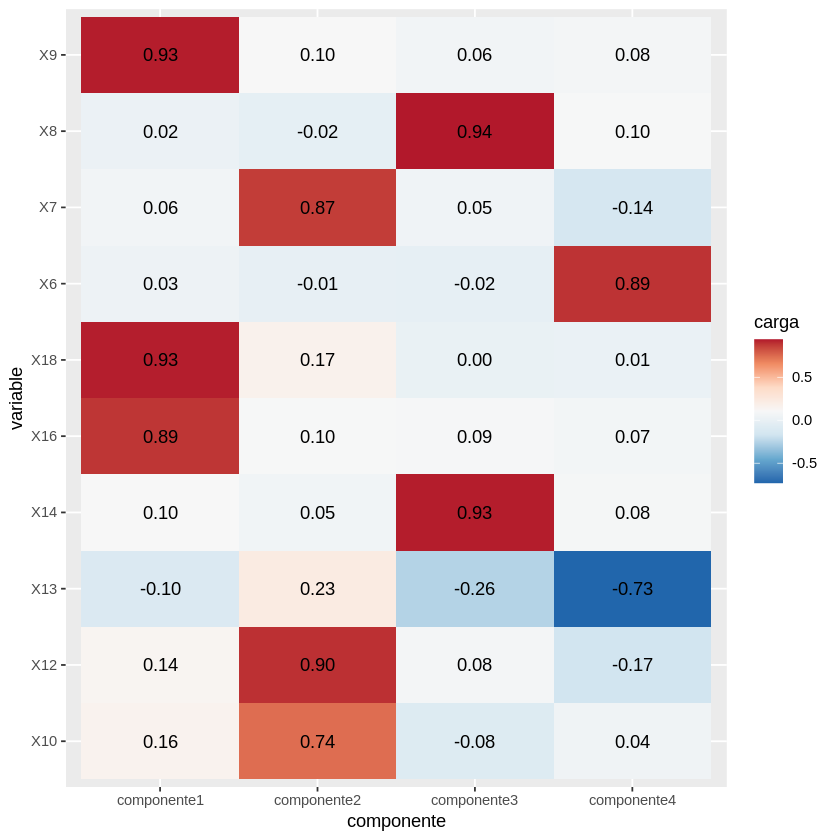

In [55]:
componente1<-componentes2$loadings[,1]
componente2<-componentes2$loadings[,2]
componente3<-componentes2$loadings[,3]
componente4<-componentes2$loadings[,4]

cargasdfr<-as.data.frame(cbind(componente1,componente2,componente3,componente4))
cargasdfr$medicion<-rownames(cargasdfr)
cargasheatr<-reshape2::melt(cargasdfr)
colnames(cargasheatr)<-c("variable","componente","carga")
ggplot(cargasheatr,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

### **Identifique los factores que agrupen las respectivas variables.  Plantee un nombre apropiado para cada factor, desde el punto de vista del negocio.**

*VARIABLES ORIGINALES*:
- X6: Métrica de calidad del producto
- X7: Métrica de actividades de comercio electrónico/página web
- X8: Medida de la asistencia técnica
- X9: Métrica de resolución de reclamaciones
- X10: Medida de la publicidad
- X12: Métrica de imagen de la fuerza de ventas
- X13: Métrica de precios competitivos
- X14: Métrica de garantías y reclamaciones
- X16: Métrica de pedidos y facturación
- X18: Métrica de la velocidad de entrega

**FACTORES**

- F1: X9, X16, X18
- F2: X7, X12, X10
- F3: X8, X14
- F4: X6, X13

**nombre de factores**
- F1: Reclamos, pedidos, facturacion y velocidad de entrega : "SATISFACCION"
- F2: e-commerce, fuerza ventas, publicidad : "MARKETING"
- F3: TI, garantias y reclamos : "SOPORTE TECNICO"
- F4: calidad, precios competicti: "COMPETITIVIDAD"